In [1]:
import pandas as pd

test = pd.read_csv("sp500_test2024.csv")
forecast = pd.read_csv("sp500_forecast2024.csv")

In [2]:
test.head()

,Date,^GSPC
0,2024-01-02,4742.830078
1,2024-01-03,4704.810059
2,2024-01-04,4688.680176
3,2024-01-05,4697.240234
4,2024-01-08,4763.540039


In [3]:
test["Date"] = pd.to_datetime(test["Date"])
test = test.set_index("Date")

In [4]:
test.head()

,^GSPC
Date,
2024-01-02,4742.830078
2024-01-03,4704.810059
2024-01-04,4688.680176
2024-01-05,4697.240234
2024-01-08,4763.540039


In [5]:
forecast.head()

,Unnamed: 0,predicted_mean
0,1006,4764.371891
1,1007,4773.382290
2,1008,4767.859381
3,1009,4775.109425
4,1010,4772.750248


In [6]:
forecast = forecast.drop(columns=forecast.columns[0])

In [7]:
forecast.head()


,predicted_mean
0,4764.371891
1,4773.382290
2,4767.859381
3,4775.109425
4,4772.750248


In [10]:
forecast.index = test.index
forecast.head()

,predicted_mean
Date,
2024-01-02,4764.371891
2024-01-03,4773.382290
2024-01-04,4767.859381
2024-01-05,4775.109425
2024-01-08,4772.750248


                 Actual     Forecast
Date                                
2024-01-02  4742.830078  4764.371891
2024-01-03  4704.810059  4773.382290
2024-01-04  4688.680176  4767.859381
2024-01-05  4697.240234  4775.109425
2024-01-08  4763.540039  4772.750248


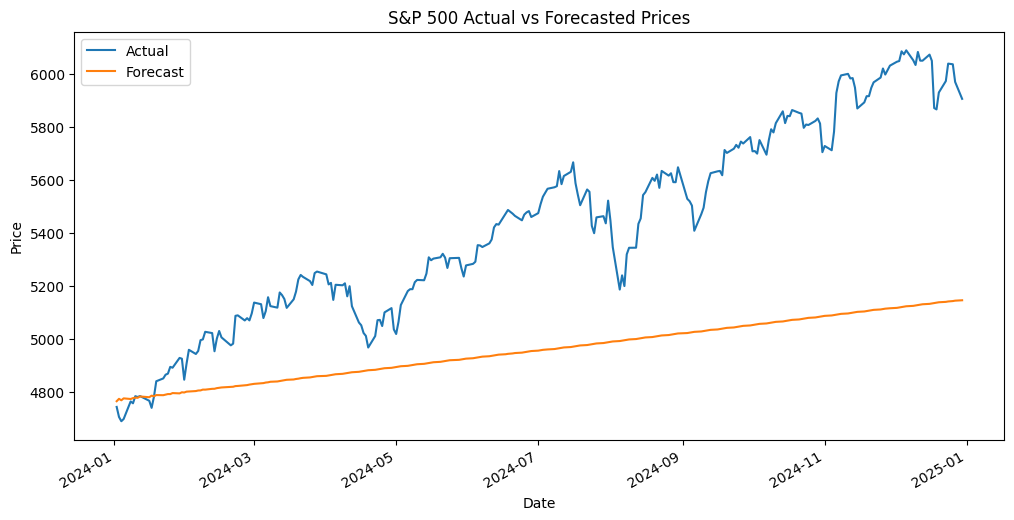

In [11]:
combined = pd.concat(
    [test["^GSPC"], forecast["predicted_mean"]],
    axis=1
)

combined.columns = ["Actual", "Forecast"]
print(combined.head())
combined.to_csv('sp500_combined2024.csv')
combined.head()
combined.plot(figsize=(12, 6))
import matplotlib.pyplot as plt
plt.title("S&P 500 Actual vs Forecasted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
